In [5]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import numpy as np
import imageio
from PIL import Image
plt.rcParams['image.cmap'] = 'RdBu_r'
def svd(A):
    # Compute the eigenvectors and eigenvalues of A.T @ A
    w, V = LA.eig(np.nan_to_num(A.T @ A))
    
    # Calculate sigma values (singular values)
    sigma = np.sqrt(np.abs(w))
    # Create the diagonal matrix D using singular values
    D = np.diag(sigma)
    
    # Calculate the U matrix
    U = np.zeros(A.shape)
    for i in range(len(sigma)):
#         U[:, i] = (1 / sigma[i]) * A @ V[:, i]
        if sigma[i] != 0:
            U[:, i] = (1 / sigma[i]) * A @ V[:, i]
        else:
            U[:, i] = 0

    
    return U, D, V.T

# Example usage:
A = np.array([ 
    [1, 0],
    [1, 0],
    [0, 1]
])
U, D, Vt =svd(A)

print("SVD:")
print("U:", U)
print("D:", D)
print("Vt:", Vt)

SVD:
U: [[0.70710678 0.        ]
 [0.70710678 0.        ]
 [0.         1.        ]]
D: [[1.41421356 0.        ]
 [0.         1.        ]]
Vt: [[1. 0.]
 [0. 1.]]


In [3]:
LA.norm(U@D@Vt-A)

0.0

In [ ]:
image = Image.open("images.png")

# Convert the image to grayscale
gray_image = image.convert("L")

# Convert the image to a NumPy array
image_array = np.array(gray_image, dtype=np.float64)
display(gray_image)

In [ ]:
U, D, Vt = svd(image_array)

In [ ]:
LA.norm(U@ D@ Vt - image_array)

In [ ]:
img_rank = np.linalg.matrix_rank(image_array, 0.)
S = np.diag(D)

# Calculate the cumulative variance explained by each singular value
total_S = S.sum()
n_components = len(S)
component_idx = range(1,  n_components + 1)
info_retained = 100 * np.cumsum(S) / total_S

# Visualizations
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

## Raw Image, X
plt.sca(axs[0])
plt.imshow(X, cmap='gray')
plt.title(f"Matrix $X$ encoding a Grayscale Image\n(Rank, $r=${img_rank})")

## Singular values as function of rank
plt.sca(axs[1])

### Raw singular values
plt.plot(component_idx, S, label='Singular Values of $$X$$', color='darkblue', linewidth=3)
plt.grid()
plt.xlabel("Rank, $k$")
plt.ylabel('$S_k$', color='darkblue')
plt.tick_params(axis='y', labelcolor='darkblue')
plt.title('Singular Values, $S_k$')

### log(singular values)
twax = plt.gca().twinx()  # twin axes that shares the same x-axis
twax.plot(component_idx, np.log(S), color='red', linewidth=3)
plt.ylabel('$\log(S_k)$\n', color='red', rotation=270)
plt.tick_params(axis='y', labelcolor='red')
plt.ylim([-6, 6])

## Information retained as function of rank
plt.sca(axs[2])
plt.plot(component_idx, info_retained, color='darkgreen', linewidth=3)
plt.xlim(0, n_components)
plt.ylim([0, 105])
plt.xlabel("Rank, $k$")
plt.grid()
plt.title('Cumulative % of Information About $X$\nCarried by Singular Vectors')

plt.savefig('image-singular-values.png', bbox_inches='tight', dpi=300)

In [ ]:
X = image_array
S = np.diag(D)

# Calculate explained variance ratio
info_retained = np.cumsum(S**2) / np.sum(S**2)

# Image Reconstruction
N = 5
fig, axs = plt.subplots(N, 4, figsize=(10, 16))
plt.sca(axs[0][0])
plt.imshow(image_array, cmap='gray')
# plt.clim([0, 255])
plt.axis('off')
plt.title("$X$", fontsize=14)

# Reconstruct image with increasing number of singular vectors/values
for power in range(1, N + 1):
    rank = 2 ** (1 + power)

    # Compressed/Reconstructed Image
    X_reconstruction = U[:, :rank] @ D[:rank, :rank] @ Vt[:rank, :]

    # Calculate number of floats required to store compressed image
    rank_data_compression = 100 * (1. - (1. * U[:, :rank].size + S[:rank].size + Vt[:rank, :].size) / image_array.size)

    # Variance of original image explained by n components
    rank_info_retained = info_retained[rank-1]

    # Visualizations
    ## Original Image
    if power > 1:
        plt.sca(axs[power-1][0])
        plt.cla()
        plt.axis('off')

    ## Image reconstruction
    plt.sca(axs[power-1][1])
    X_reconstruction = np.clip(X_reconstruction, 0, 255).astype(np.uint8)
    plt.imshow(X_reconstruction, cmap='gray')
    plt.clim([0, 255])
    plt.axis('off')
    plt.title(f'$\hat{{X}}_{{{rank}}}$',fontsize=14)

    ## Reconstruction error
    plt.sca(axs[power-1][2])
    cax = plt.imshow(X - X_reconstruction)
    plt.axis('off')
    plt.title(f'$X -\hat{{X}}_{{{rank}}}$',fontsize=14)


    ## Compression/reconstruction info
    plt.sca(axs[power-1][3])
    compression_text = f'Compression: {rank_data_compression:1.1f}%\nInfo. Retained {rank_info_retained:1.1f}%'
    plt.text(-.1, .4, compression_text)
    plt.axis('off')
    
fig.colorbar(cax, ax=axs[0][2], pad=.01, orientation='horizontal')

In [ ]:
X_centered =  image_array - np.mean(image_array, axis=0)

In [ ]:
plt.imshow(X_centered,cmap='gray')

In [ ]:
U, D, Vt = svd(X_centered)

In [ ]:
A = m**(1/2)*U
Bt =m**(-1/2)*D@Vt

In [ ]:
LA.norm(A@Bt-X_centered)

In [ ]:
k=100

In [ ]:
A_k =m**(1/2)*U[:,:k]
Bt_k =m**(-1/2)*D[:k,:k]@Vt[:k,:]

In [9]:

def pca(X, k):
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Perform SVD on the centered data
    U, D, Vt = svd(X_centered)
    
    # Compute the transformed matrices
    m = X_centered.shape[0]
    A = m**(1/2)*U
    Bt = m**(-1/2)*D@Vt

    # Reduce the dimensionality to k dimensions
    A_k = m**(1/2)*U[:,:k]
    Bt_k = m**(-1/2)*D[:k,:k]@Vt[:k,:]

    return A_k, Bt_k


In [ ]:
A_k, Bt_k = pca(X_centered,100)

In [ ]:
LA.norm(A_k@Bt_k - X_centered)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100) # K = 100
pca.fit(X_centered)


In [ ]:
X_transformed = pca.transform(X_centered)

In [ ]:
X_transformed.shape

In [ ]:
pca.components_.shape

In [ ]:
pca.components_.T@X_transformed.T

In [ ]:
X_approx = pca.components_.T@X_transformed.T


In [ ]:
LA.norm(X_approx.T - X_centered)

In [ ]:
plt.imshow(X_approx.T,cmap='gray')

In [93]:
D 

77760

In [87]:
path ="faces/"
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'
fn = path + prefix + str(1).zfill(2) + '.' + "sleepy" + surfix
im = imageio.imread(fn)
h = 243 # hight 
w = 320 # width
D = h * w
N = len(states)*15 

X = np.zeros((D, N))
# collect all data
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = imageio.imread(fn).reshape(D)
        cnt += 1

C:\Users\nnnam1\AppData\Local\Temp\ipykernel_16388\4291633668.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)
C:\Users\nnnam1\AppData\Local\Temp\ipykernel_16388\4291633668.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  X[:, cnt] = imageio.imread(fn).reshape(D)


In [51]:
path ="faces/"
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'
fn = path + prefix + str(1).zfill(2) + '.' + "sleepy" + surfix
im = imageio.imread(fn)
h = 243 # hight 
w = 320 # width
D = (w//4)*(h//4)
N = len(states)*15

X = np.zeros((D, N))  # Updated to match the new image size
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        img = Image.open(fn)
        img_resized = img.resize((w//4, h//4))
        X[:, cnt] = np.array(img_resized).reshape(D)
        cnt += 1

C:\Users\nnnam1\AppData\Local\Temp\ipykernel_16388\695346354.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)


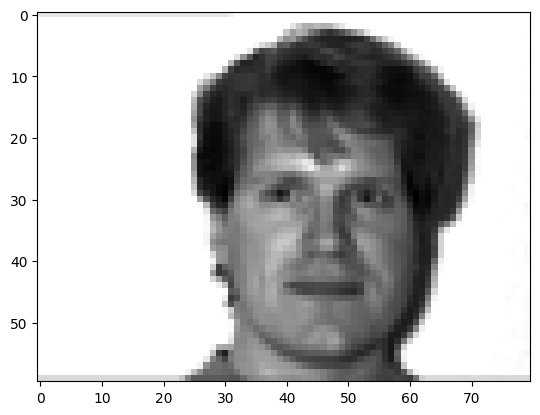

In [61]:
plt.imshow(X[:,0].reshape(60,80),cmap='gray')

In [49]:
np.array(img_resized).shape

(60, 80)

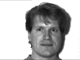

In [50]:
img_resized

In [42]:
img_resized.size

(80, 60)

In [57]:
np.array(img_resized)

array([[231, 231, 231, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 239, 243, 249],
       [255, 255, 255, ..., 251, 251, 248],
       [219, 219, 219, ..., 213, 210, 217]], dtype=uint8)

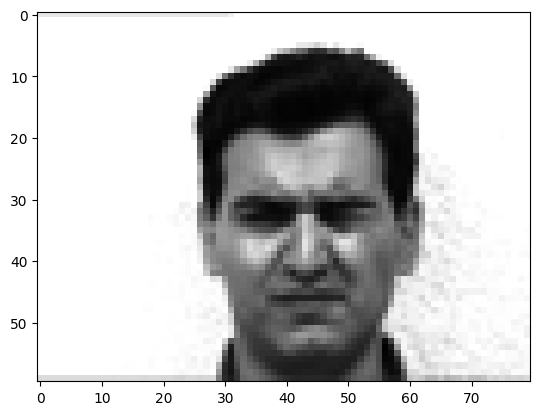

In [59]:
plt.imshow(np.array(img_resized),cmap='gray')

In [107]:
U, Z = pca(X,100)

C:\Users\nnnam1\AppData\Local\Temp\ipykernel_16388\3108466779.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  U[:, i] = (1 / sigma[i]) * A @ V[:, i]


In [108]:
U.shape

(77760, 100)

In [105]:
np.mean(X, axis=1).shape

(77760,)

In [109]:
X_tight = U@Z

In [102]:
bca

array([[226.61591382, 234.84924488, 225.41650067, ..., 231.87110088,
        227.59929017, 234.22586486],
       [226.66655547, 235.48951155, 226.83141157, ..., 231.86064537,
        228.03313864, 233.03924559],
       [225.9667173 , 235.62473076, 225.10409478, ..., 230.92097652,
        229.1560321 , 234.29595179],
       ...,
       [227.69165137, 219.27382621, 220.61347776, ..., 206.98525343,
        208.85357639, 214.79834236],
       [227.9385571 , 219.36512305, 223.69056002, ..., 199.74860408,
        203.21818443, 216.32833798],
       [224.77792347, 218.88321975, 224.27462613, ..., 206.32988133,
        210.70760708, 221.46736055]])

In [101]:
X_tight

array([[42.08966382+0.j, 34.04570321+0.j, 26.86587567+0.j, ...,
        47.31797588+0.j, 46.97595684+0.j, 43.77440653+0.j],
       [42.14030547+0.j, 34.68596988+0.j, 28.28078657+0.j, ...,
        47.30752037+0.j, 47.40980531+0.j, 42.58778726+0.j],
       [41.4404673 +0.j, 34.82118909+0.j, 26.55346978+0.j, ...,
        46.36785152+0.j, 48.53269877+0.j, 43.84449346+0.j],
       ...,
       [43.16540137+0.j, 18.47028454+0.j, 22.06285276+0.j, ...,
        22.43212843+0.j, 28.23024306+0.j, 24.34688402+0.j],
       [43.4123071 +0.j, 18.56158138+0.j, 25.13993502+0.j, ...,
        15.19547908+0.j, 22.59485109+0.j, 25.87687964+0.j],
       [40.25167347+0.j, 18.07967808+0.j, 25.72400113+0.j, ...,
        21.77675633+0.j, 30.08427374+0.j, 31.01590222+0.j]])

In [125]:
X_mean=np.mean(X, axis=1).reshape(-1,1)

In [113]:
bca =np.float64(X_tight+np.mean(X, axis=1).reshape(-1,1))

C:\Users\nnnam1\AppData\Local\Temp\ipykernel_16388\906221799.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  bca =np.float64(X_tight+np.mean(X, axis=1).reshape(-1,1))


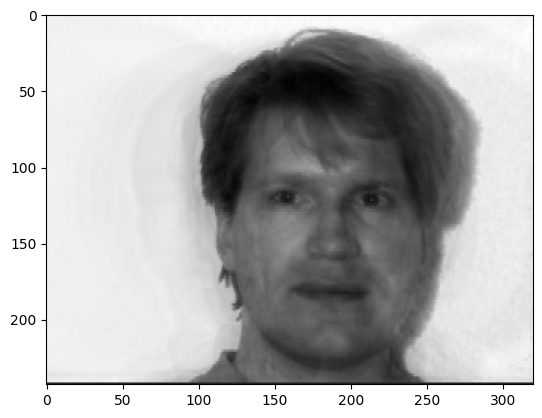

In [116]:
plt.imshow(bca[:,0].reshape(243, 320),cmap='gray')

In [118]:
LA.norm(X_tight-X)

641308.8315982291

In [126]:
im.reshape(D, 1)-X_mean

array([[6.51515152],
       [6.49090909],
       [6.22424242],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

C:\Users\nnnam1\AppData\Local\Temp\ipykernel_16388\1303275049.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)  #X


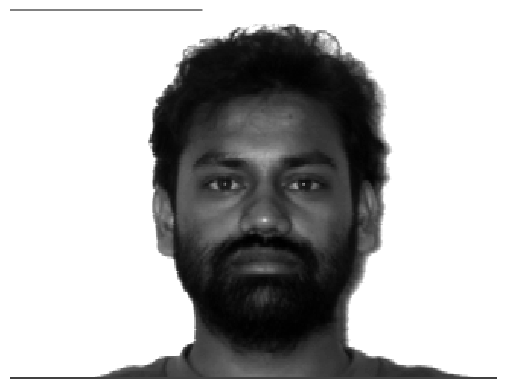

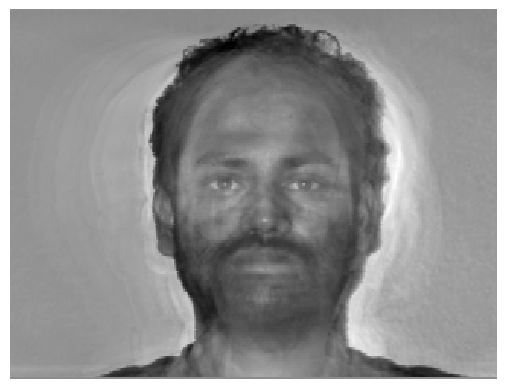

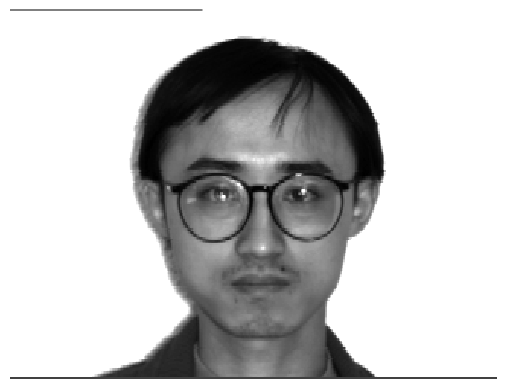

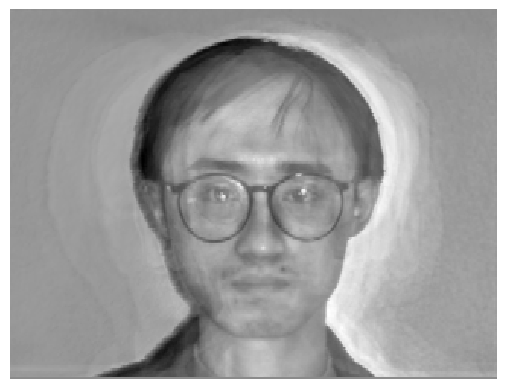

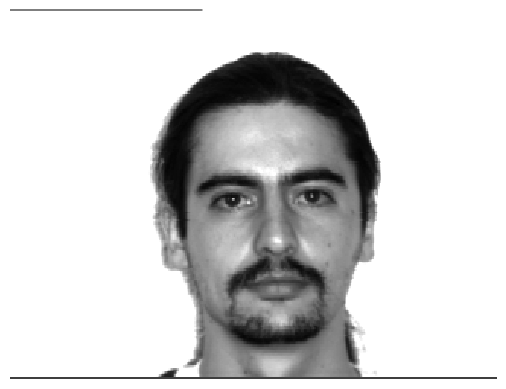

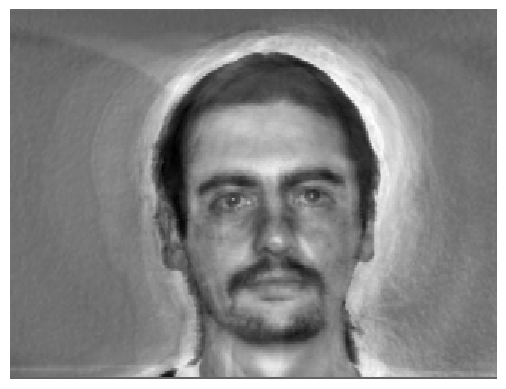

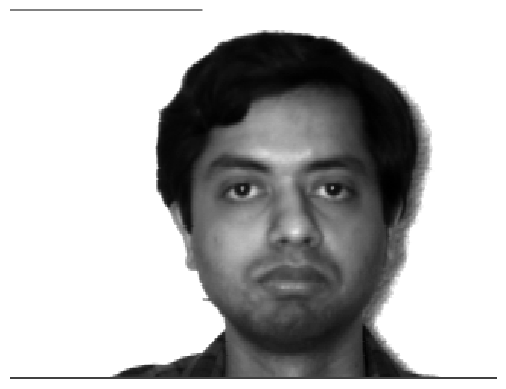

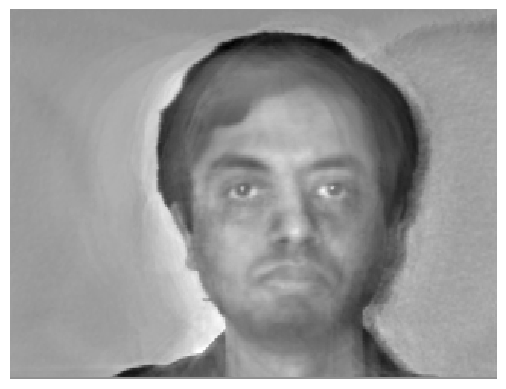

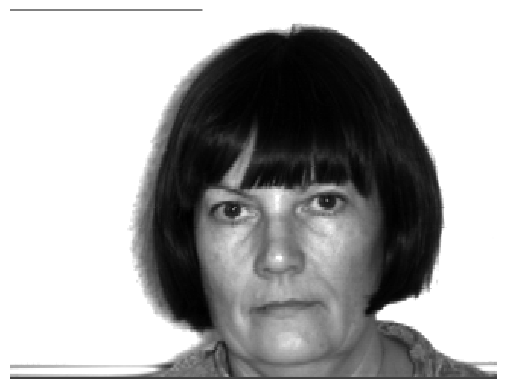

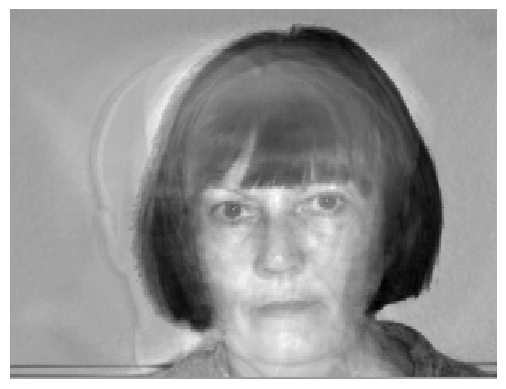

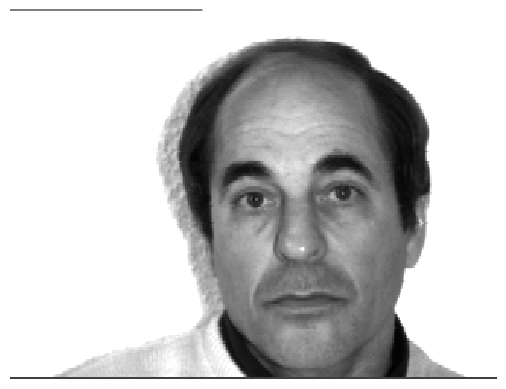

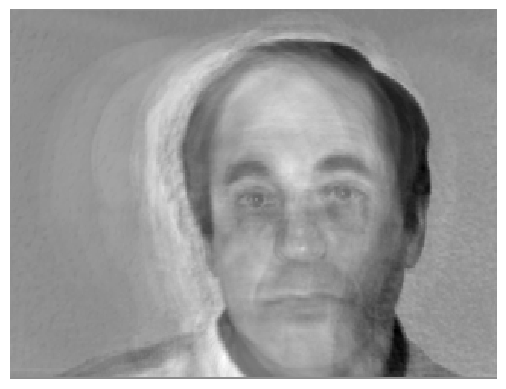

In [127]:
for person_id in range(7, 13):
    for state in ['centerlight']:
        fn = path+ "/"+ prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = imageio.imread(fn)  #X
        plt.axis('off')
        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.show()
        # reshape and subtract mean, don't forget 
        x = im.reshape(D, 1) - X_mean   # X -X_mean
        # encode
        z = U.T.dot(x) #
        #decode
        x_tilde = U.dot(z) + X_mean

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(243, 320)
        plt.axis('off')
    #         plt.imshow(im_tilde, interpolation='nearest' )
        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'res' + str(person_id).zfill(2) + '.png'
    #         plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

In [128]:
from sklearn.decomposition import PCA
pca_real = PCA(n_components=100) # k = 100 
pca_real.fit(X.T)

PCA(n_components=100)